In this notebook, we work out how to cheat by looking at the typical patterns that will beat the game in each case. Because the initial weights are random in each case, such patterns will not always work, but it shows the kind of pattern that is necessary to win at each level.

In [2]:
import numpy as np
from preclict.models import models
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
level = 2
moves = 100
runs = 1
max_level = 10

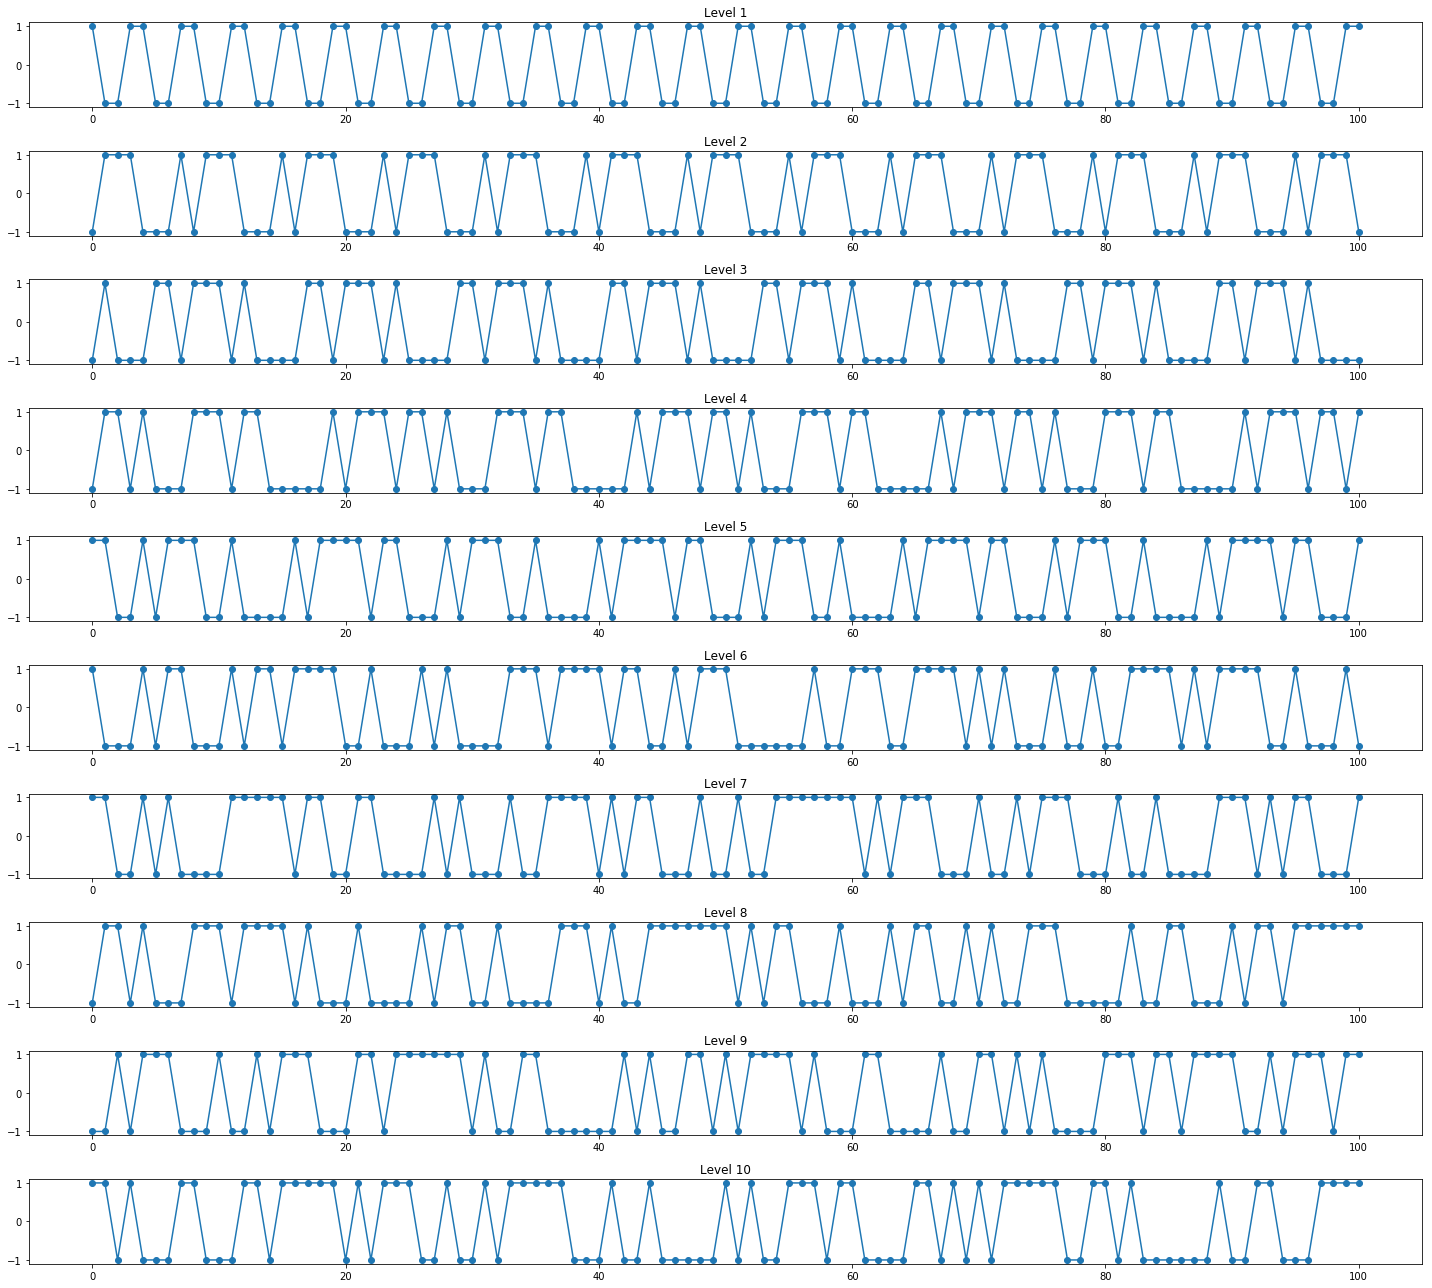

In [5]:
plt.figure(figsize=(20, 18))
for level in range(1, max_level+1):    
    model = models.load('PerceptronWithMemoryModel.{"memory":%d}' % (level))
    moves_log = []    
    start = np.random.randint(2)
    if start == 0: start = -1
    moves_log.append(start)
    model.update_model(start)
    pred = model.predict()    
    for move in range(moves):
        model.update_model(-pred)
        moves_log.append(-pred)
        pred = model.predict()        
    plt.subplot(max_level,1,level)
    plt.plot(moves_log, 'o-')
    plt.title('Level %d' % level)
plt.tight_layout()